area = 140.92363726056848


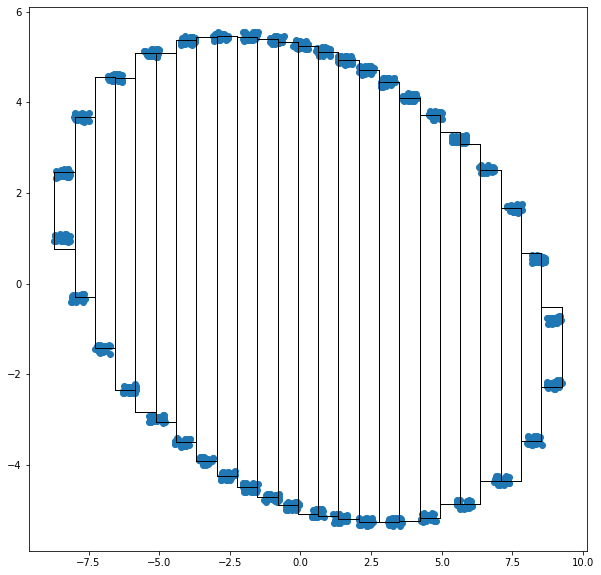

In [1]:
######################### Stirling engine Code  #######################################
#Nikolai Lesack Feb/15/2022


# This code can be used to calculate the area inside a set of points
#To run this code you will want to modify the inputted data file, the data columns used 
#and the number of rectangle bins used termed "bins"

import numpy as np
import matplotlib.pyplot as plt

#set figure size
plt.rcParams['figure.figsize'] = [10, 10]

################ Import data ###############################################################
#Here are a few example data files that can be run by uncommenting them 
#To run your own code modify the file called

#Data = np.loadtxt("triangle.txt")
Data = np.loadtxt("ellipse_noisy.txt")
#Data = np.loadtxt("circle.txt")


#Will have to check which column is x and y when importing 
#data and change the x and y indices appropriately 
np.shape(Data)
x = Data[:,0]
y = Data[:,1]


#plot data 
plt.scatter(x, y)


################### Calculating the area ##############################################

#this specifies the number of rectangels that will be used in the calculation, 
#the greater the number of rectangles the higher the accuracy however
#if the rectangles become too small an error will occur due to no points being 
#inside the rectangle bins
bins = 25 

#Next want to find the length of the area in the x-axis
#Find the largest x value 
min_x = min(x) 
max_x = max(x) 

#Next define the step size for each bin based length of shape in x and number of bins
x_step = (max_x - min_x)/bins 

#preset area for iterative calc
area = 0 



#Next use for loop to calculate area of each box
for l in range(bins):
    
    #set boundaries of the given rectangle bin
    x1 = min_x + x_step*l
    x2 = min_x + (l+1)*x_step
    
    #define empty list that will hold y-values in the bin
    y_list = [] 
    
    #This loop checks if a given value of x is in the current rectangular bin
    #and if it is it adds the corresponding y value to a list
    for q in range(len(x)): 
        
        if x1 <= x[q] < x2:
            y_list.append(y[q]) 
        
        
    #Next for the points in the given bin, find the mean y value
    y_mean = sum(y_list)/len(y_list)  
    

    #Seperate y values into those above and below range
    yhigh = [i for i in y_list if i >= y_mean] 
    ylow =  [i for i in y_list if i < y_mean]
 

    #Find mean of sperated y values 
    yhigh_mean = sum(yhigh)/len(yhigh)
    ylow_mean = sum(ylow)/len(ylow)
    
    #calculate area of rectangle and add it to running average 
    area = area + ((yhigh_mean - ylow_mean) * x_step)
    
    
    #Plot the rectanlge bin
    plt.plot([x1, x1], [yhigh_mean, ylow_mean], 'k-', lw=1)
    plt.plot([x2, x2], [yhigh_mean, ylow_mean], 'k-', lw=1)
    plt.plot([x1, x2], [yhigh_mean, yhigh_mean], 'k-', lw=1)
    plt.plot([x1, x2], [ylow_mean, ylow_mean], 'k-', lw=1)
    
        
print('area =', area)

plt.show()
